# Question one

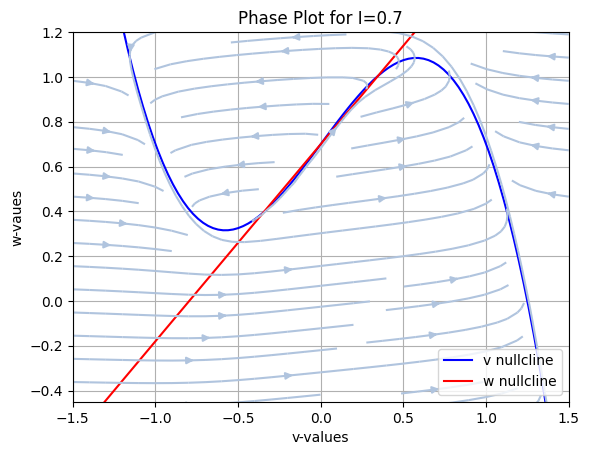

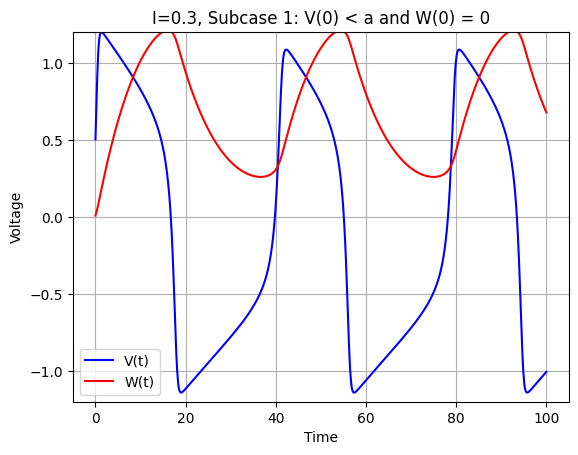

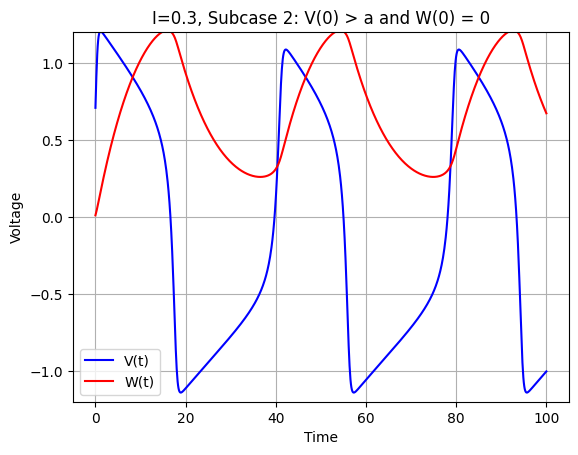

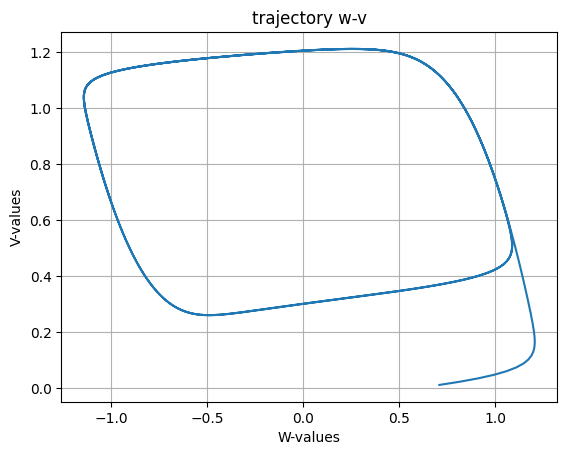

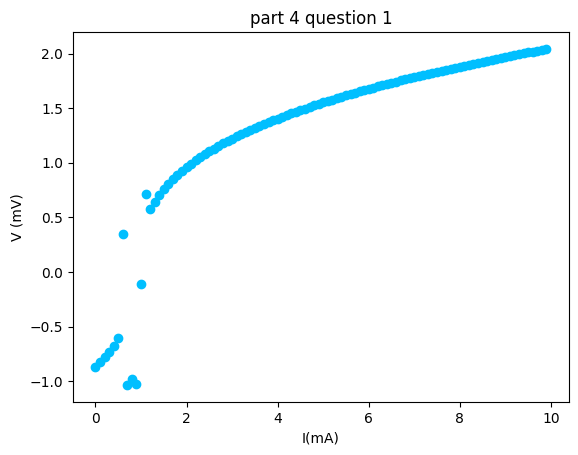

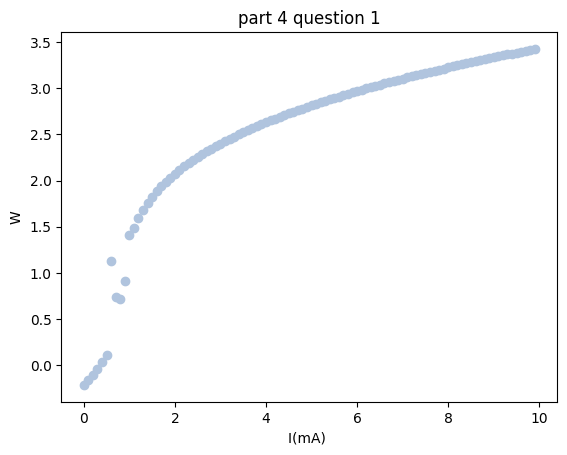

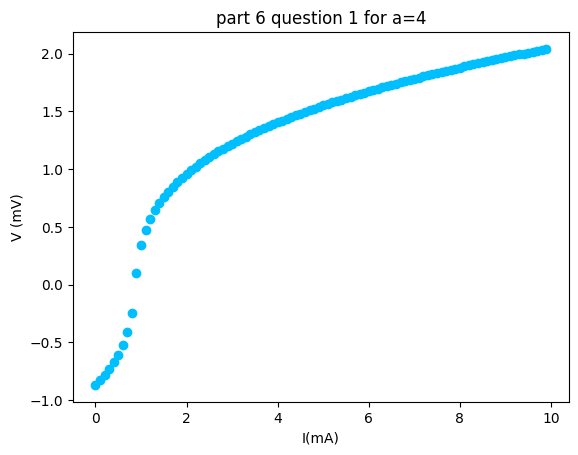

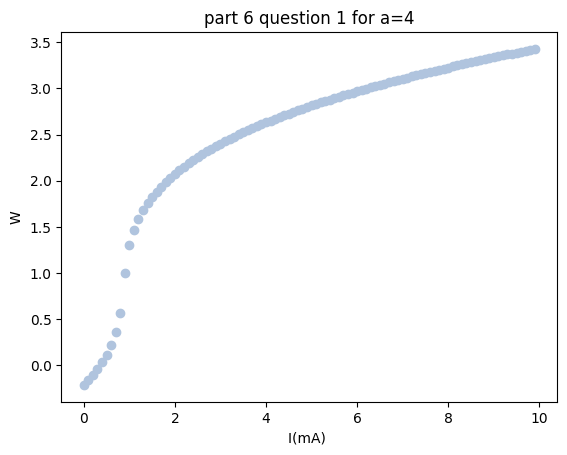

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#QUESTION ONE
#we are using the equation we got in part 1-1 v(v-1)(a-v)
a = -1
b, r = 0.08, 0.8
f = lambda v: v*(a-v)*(v-1)
dvdt = lambda v, w, I: f(v)-w+I
dwdt = lambda v, w: b*(v-r*w+0.7)
#our FHN model
def FHN(v, w, dt, I, ttot):
    niter = int(ttot/dt)
    vhist = []
    whist = []
    for i in range(niter):
        v, w = (v + dvdt(v, w, I)*dt), (w + dwdt(v, w)*dt)
        vhist.append(v)
        whist.append(w)
    return vhist, whist
#defining nullcline function
def nullclines(I, v,w):
    vnc = f(v) + I
    wnc = b*v+r*w+0.7
    return vnc, wnc
#plotting v and w based on t
def plot_fig(y, title="", ylim=(), x=None, xlim=()):
    plt.figure()
    plt.title(title)
    color = ["b", "r"]
    if not x:
        for i in y:
            plt.plot(i)
    else:
        for i,j in enumerate(y):
            plt.plot(x, j, color=color[i])
    if ylim: plt.ylim(ylim)
    if xlim: plt.xlim(xlim)
    plt.xlabel("Time")
    plt.ylabel("Voltage")
    plt.legend(["V(t)", "W(t)"])
    plt.grid()
    plt.show()
#plotting nullcline function
def plot_nullclines(I, xlim, ylim, positions):
    color = ['lightsteelblue', 'gold', 'tomato']*3
    v = np.linspace(xlim[0], xlim[1], 100)
    w = np.linspace(xlim[0], xlim[1], 100)
    v_mesh, w_mesh = np.meshgrid(v, w)
    v_vel = dvdt(v_mesh, w_mesh, I)
    w_vel = dwdt(v_mesh, w_mesh)
    vnc, wnc = nullclines(I, v,w)
    plt.figure()
    plt.plot(v, vnc, 'b')
    plt.plot(v, wnc, 'r')
    plt.legend(['v nullcline', 'w nullcline'])
    plt.ylim(ylim[0], ylim[1])
    title = "Phase Plot for I=" + str(round(I, 2))
    plt.title(title)
    plt.xlabel('v-values')
    plt.ylabel('w-vaues')
    if positions:
        for i in range(len(positions)):
            plt.streamplot(v_mesh, w_mesh, v_vel, w_vel, density=2, start_points=[positions[i]], color=color[i], integration_direction="forward", arrowsize=2)
    else:
        plt.streamplot(v_mesh, w_mesh, v_vel, w_vel, color=color[0])
    plt.grid()
    plt.show()

#####################################################

I = 0.7

# Nullclines
plot_nullclines(I, (-1.5,1.5), (-0.45,1.2), [])

# Subcase 1: V(0) < a and W(0) = 0
x = list(np.linspace(0,100,1000))
vhist, whist = FHN(0.4, 0, 0.1, I, 100)
plot_fig([vhist, whist], "I=0.3, Subcase 1: V(0) < a and W(0) = 0", (-1.2,1.2), x)

# Subcase 2: V(0) > a and W(0) = 0
vhist, whist = FHN(0.6, 0, 0.1, I, 100)
plot_fig([vhist, whist], "I=0.3, Subcase 2: V(0) > a and W(0) = 0", (-1.2,1.2), x)

#trajectory
plt.plot(vhist,whist)
plt.title("trajectory w-v")
plt.xlabel('W-values')
plt.ylabel('V-values')
plt.grid()
plt.show()
########################part 4
vi = -0.3 
wi = 0
time = np.arange(0 , 100, 0.1)
v = np.zeros (len (time))
v[0] = vi
w = np.zeros (len (time))
w01 = wi
Is = np.arange (0 ,10 , 0.1)
V = np. zeros (len (Is) )
W = np.zeros (len (Is) )
for j in range(0 , len(Is)) :
    I = np.ones(len (time))
    v[0] = vi
    w[0] = wi
    I = I * Is[j]
    for i in range(0 , len (time)-1) :
        v[i+1] = v[i] + dt* (v[i] - (v[i]**3) -w[i] + I[i])
        w[i+1] = w[i] + dt*0.08* (v[i] + 0.7 - (0.8*w[i]))
    V[j] = v[len (time)-1]
    W[j] = w[len (time)-1]
fig = plt.figure()
plt.scatter (Is , V ,color="deepskyblue")
plt.gca().set_title("part 4 question 1")
plt.ylabel('V (mV)')
plt.xlabel('I(mA)')
plt.figure()
plt.scatter (Is , W, color = "lightsteelblue")
plt.gca().set_title("part 4 question 1")
plt.ylabel ('W')
plt.xlabel('I(mA) ')
plt.show()
##########part 6 for a=4
vi = -0.3 
wi = 0
time = np.arange(0 , 100, 0.1)
v = np.zeros (len (time))
v[0] = vi
w = np.zeros (len (time))
w01 = wi
Is = np.arange (0 ,10 , 0.1)
V = np. zeros (len (Is) )
W = np.zeros (len (Is) )
for j in range(0 , len(Is)) :
    I = np.ones(len (time))
    v[0] = vi
    w[0] = wi
    I = I * Is[j]
    for i in range(0 , len (time)-1) :
        v[i+1] = v[i] + dt* (v[i] - (v[i]**3) -w[i] + I[i])
        w[i+1] = w[i] + dt*4* (v[i] + 0.7 - (0.8*w[i]))
    V[j] = v[len (time)-1]
    W[j] = w[len (time)-1]
fig = plt.figure()
plt.scatter (Is , V ,color="deepskyblue")
plt.gca().set_title("part 6 question 1 for a=4")
plt.ylabel('V (mV)')
plt.xlabel('I(mA)')
plt.figure()
plt.scatter (Is , W, color = "lightsteelblue")
plt.gca().set_title("part 6 question 1 for a=4")
plt.ylabel ('W')
plt.xlabel('I(mA) ')
plt.show()

# ###Question 2

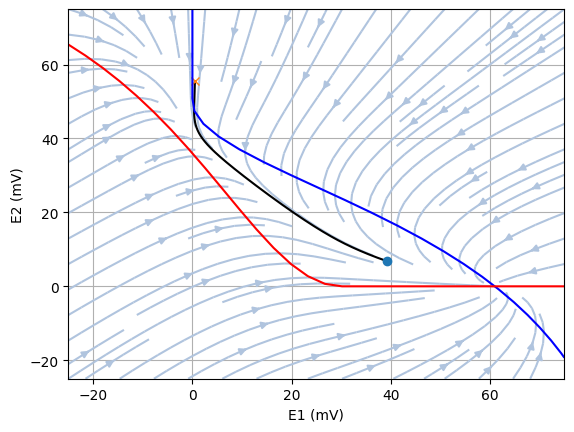

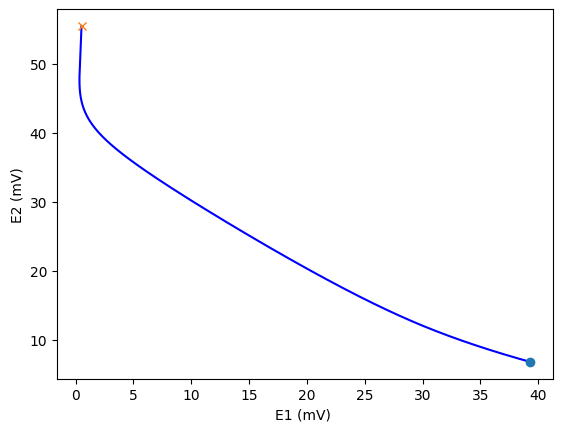

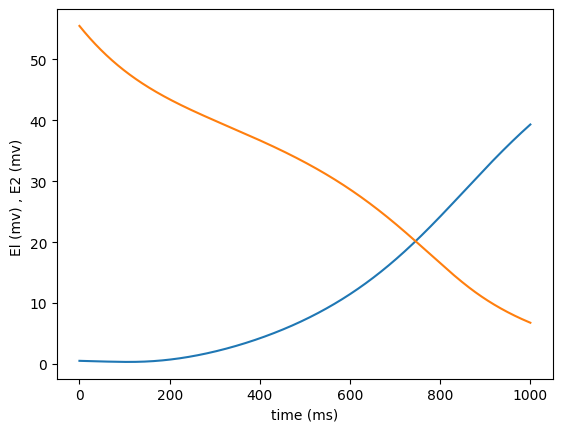

In [84]:
#defining S(x)
def S(x):
    M = 100
    sig = 120
    N = 2
    if (x >= 0):
        return ((M* (x**N)) / ((sig**N)+(x**N)) )
    else:
        return 0
#initial values    
tau = 220
e1i = 1
e2i = 0
k1 = 120
k2 = 120
#winner takes all function
def WTA(x, t = 0):
    E1, E2 = x
    dE1 = (-1*E1 + S( (k1-3*E2)))/tau
    dE2 = (-1*E2 + S( (k2-3*E1)))/tau
    return np.array ([dE1, dE2])
#initial conditions
time = np.arange(0 ,1000, 0.1)
e1 = np.zeros (len (time) )
e1[0] = e1i
e2 = np. zeros (len (time) )
e2[0] = e2i
rangex = (-25,75)
rangey = (-25,75)
points = 30
x= np.linspace (rangex[0], rangex[1], points)
y = np.linspace (rangey[0], rangey[1], points)
grid = np.meshgrid(x, y)
diff = np.zeros ( (points, points, 2))
for nx in range (points):
    for ny in range(points):
        df = WTA([grid[0][nx,ny], grid[1][nx,ny]])
        diff[nx, ny, 0] = df[0]
        diff[nx, ny, 1] = df[1]
plt.streamplot(grid[0],grid[1],diff[:,:,0],diff[:,:,1],color='lightsteelblue')
for i in range(0 , len(trange)-1):
    e1[i+1] = e1[i] + dt* (-1 * e1[i] + S((k1 - 3*e2[i])))/tau
    e2[i+1] = e2[i] + dt* (-1 * e2[i] + S((k2 - 3*e1[i])))/tau
plt.plot (e1, e2,'k')
plt.plot (e1[len(trange)-1] ,e2[len(trange)-1] , 'o')
plt.plot (e1[0] , e2[0] , 'x')
plt.contour(grid[0], grid[1], diff[:, :, 0], [0], colors ='b')
plt.contour (grid[0], grid[1], diff[:, :, 1], [0], colors = 'r')
plt.grid()
plt.xlabel ('E1 (mV)')
plt.ylabel ('E2 (mV)')
plt.show()
########################trajectory
for i in range(0 , len(trange)-1):
    el[i+1] = el[i] + dt* (-1 * el[i] + S((k1 - 3*e2[1])))/tau
    e2[i+1] = e2[i] + dt* (-1 * e2[i] + S((k2 - 3*e1[i])))/tau
plt.plot (e1, e2,'blue')
plt.xlabel ('E1 (mV) ')
plt.ylabel ('E2 (mV)')
plt.plot (e1[len(trange)-1] ,e2[len(trange)-1] , 'o')
plt.plot (e1[0] , e2[0] , 'x')
plt.figure ()
plt.plot (trange , e1 )
plt.plot (trange , e2 )
plt.xlabel ('time (ms)')
plt.ylabel ('El (mv) , E2 (mv) ')
plt.show()